# Interpolação via Newton

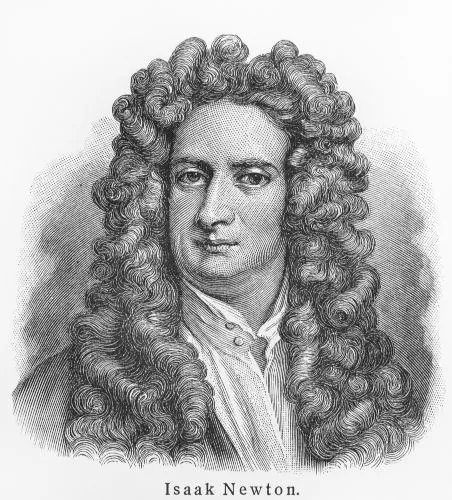
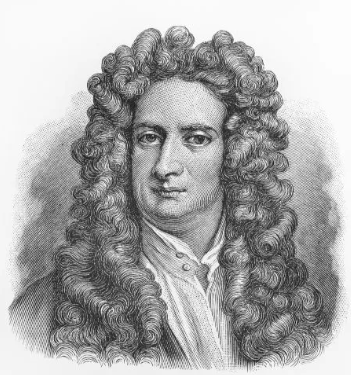
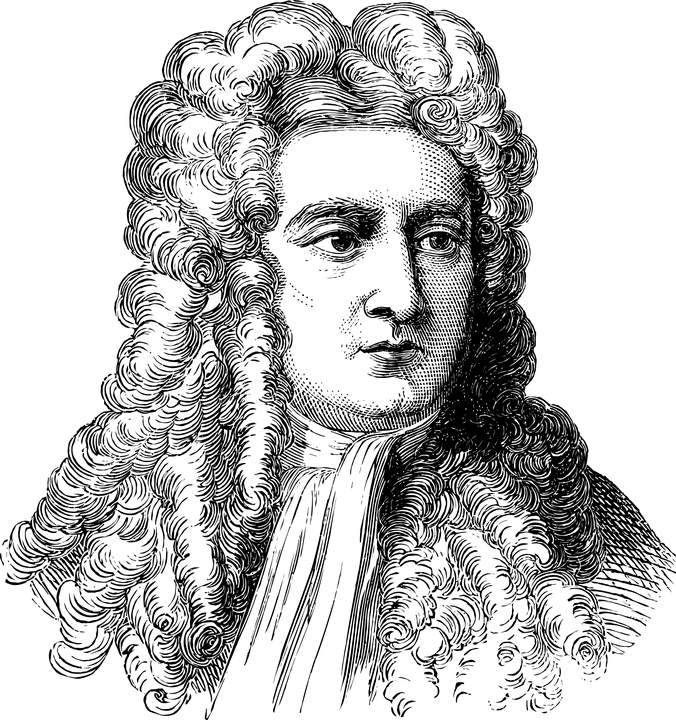

O método de Newton se baseia em algumas restrições e peculiaridades para sua resolução. Essas restrições são plenamente definidas no teorema que se segue:

<h5>Teorema</h5>

Seja <b>f(x) contínua</b> e com tantas derivadas contínuas quanto necessárias num intervalo [a, b]. Sejam $a = x_{0} < x_{1}< x_{2} < ... < x_{n} = b$, $n+1$ pontos. A forma de Newton para o polinômio de grau $\le n$ que interpola <b>f(x)</b> em $x_{0}, ...,  x_{n}$ é dada por

$P(n) = f(x_{0}) + (x - x_{0})f[x_{0}, x_{1}] + (x - x_{0})(x - x_{1})f[x_{0}, x_{1}, x_{2}] + ... + (x - x_{0})(x - x_{1})...(x - x_{n-1})f[x_{0}, x_{1}, ... , x_{n}]$

Com isso, podemos afirmar que seu erro é:

$E_{n}(x) = (x - x_{0})(x - x_{1})...(x - x_{n}) \cdot max\mid f[x_{0}, x_{1}, ... , x_{n}]\mid$

Para entender melhor o operador f[.], faremos a seguinte ilustração: